# Winter Statistics of Temperature and Velocity Gradients at the Global Irminger Sea Array

## Data Evaluation Report
- Station : Global Irminger Sea
- Date : 2018 - 07 - 18
- Evaluator : Adekunle Ajayi
- Email : adeajayi.kunle@gmail.com

### Moorings : 
- Apex Surface Mooring : 2 (GI01SUMO)
- Flanking Subsurface Mooring A : 3 (GI03FLMA)
- Flanking Subsurface Mooring B : 4 (GI03FLMB)

### Instruments
- CTD : Conductivity, Temperature, and Depth.
- ADCP : Acoustic Doppler Current Profiler.

### Summary: 
A fair comparison of the CTD for different moorings at different depths is made. The Apex surface mooring CTD @ 40m has missing datapoints while the Mooring A and B datasets are fairly good. Using the ADCP velocity time series, velocity gradients is constructed and the Pdfs of the velocity gradients in winter time show that Global Irminger Sea station is govern by mesoscale dynamics  (with low rossby number) and this confirm that the velocity profiles are within expected range.

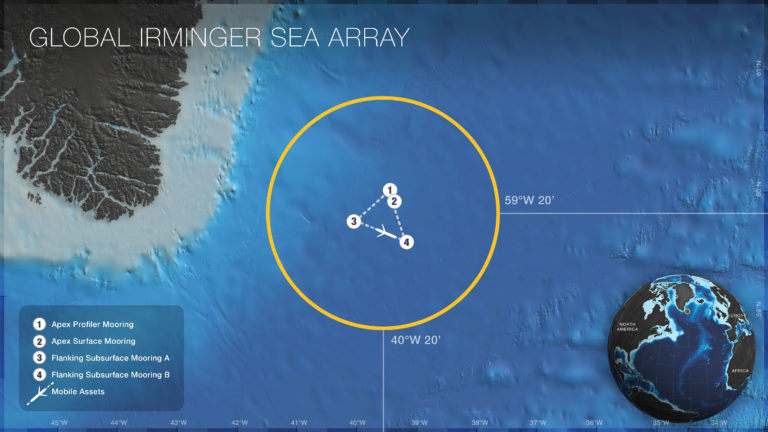

In [0]:
# - Load image of the Global irminger station
from IPython.display import Image
Image('CEV-OOI-Global-Irminger-Sea-768x432.jpg')

# 0 - Define Usename and Token

In [0]:
USERNAME = ''
TOKEN =  ''

# 1 - Import relevant modules

In [0]:
import requests,cmocean
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cbook
import pandas as pd
import datetime
import re,os
sns.set()
%autosave 60

Autosaving every 60 seconds


In [0]:
sns.set(color_codes=True)
sns.set_style("white")

In [0]:
# API base url
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# All of the following are optional
params = {
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}

# 2 - Define useful functions

In [0]:
def get_data_path(instrument):
    '''This functions combines the filepath'''
    global SENSOR_BASE_URL,site,node,stream
    data_path ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))
    return str(data_path)

In [0]:
def get_data_path2(SENSOR_BASE_URL,site,node,stream,instrument):
    '''This functions get combines the filepath'''
    data_path ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))
    return str(data_path)

In [0]:
def get_html_url(data_path):
    '''This function makes a request for the dataset'''
    global USERNAME, TOKEN, params
    r = requests.get(data_path, params=params, auth=(USERNAME, TOKEN))
    rjson = r.json(); url = rjson['allURLs'][0];
    return url

In [0]:
def get_data_nc_from_url(url):
    '''This functions '''
    tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
    datasets = requests.get(url).text
    urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
    x = re.findall(r'(ooi/.*?.nc)', datasets)
    for i in x:
        if i.endswith('.nc') == False:
            x.remove(i)
    for i in x:
        try:
            float(i[-4])
        except:
            x.remove(i)
    data_nc = [os.path.join(tds_url, i) for i in x]
    return data_nc

In [0]:
def get_ds(url):
    '''get the xarray dataset'''
    ds = xr.open_mfdataset(get_data_nc_from_url(url))
    ds = ds.swap_dims({'obs': 'time'})#
    ds = ds.sortby('time') #  
    return ds

In [0]:
def get_data_variables(ds):
    temp = ds['ctdmo_seawater_temperature']
    pres = ds['ctdmo_seawater_pressure']
    cond = ds['ctdmo_seawater_conductivity']
    sal = ds['practical_salinity']
    dens= ds['density']
    return temp,pres,cond,sal,dens

In [0]:
def get_CTD_var(url):
    '''Get variables in the xarray dataset'''
    ds =get_ds(url)
    temp,pres,cond,sal,dens = get_data_variables(ds)
    return temp,pres,cond,sal,dens

In [0]:
def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None

In [0]:
def get_ANNO_data(refdes):
    ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
    params = {
      'beginDT':int(datetime.date(2015,1,1).strftime('%s'))*1000,
      'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000,
      'refdes': refdes,
    }
    # Send the request
    r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
    data = r.json()
    return data

In [0]:
def print_ANNO(data):
    df = pd.DataFrame() # Setup empty array
    for d in data:
      df = df.append({
        'annotation': d['annotation'],
        'start': convert_time(d['beginDT']),
        'stop': convert_time(d['endDT']),
        'site': d['subsite'],
        'node': d['node'],
        'sensor': d['sensor'],
        'id': d['id']
      }, ignore_index=True)
    pd.set_option('display.max_colwidth', -1) # Show the full annotation text
    return df

# A - ANALYSIS OF CTDs

## 3 - Apex Surface Mooring : 2 (GI01SUMO - RII11)

|S/N| Depth | Reference | Method | Stream |
|---|---|---|---|---|
|1|40m|02-CTDMOQ031|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|2|100m|02-CTDMOQ013|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|3|130m|02-CTDMOQ033|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|4|250m|02-CTDMOQ015|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|5|350m|02-CTDMOQ016|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|6|500m|02-CTDMOQ017|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|


## 3.1 - Get instruments data link

In [0]:
# Define Instrument Information for the CTD
site = 'GI01SUMO'
node = 'RII11'
method = 'recovered_inst'
stream = 'ctdmo_ghqr_instrument_recovered'

In [0]:
# - define the CTD o work with
ctd_ids = ['02-CTDMOQ031','02-CTDMOQ013','02-CTDMOQ033','02-CTDMOQ015','02-CTDMOQ016','02-CTDMOQ017']

In [0]:
# generate the datasets urls
AS_html_urls_arr = []
for j in range(len(ctd_ids)):
    data_path = get_data_path(ctd_ids[j])
    r = requests.get(data_path, params=params, auth=(USERNAME, TOKEN))
    rjson = r.json(); url = rjson['allURLs'][0];
    print(url)
    #nc_url = get_data_nc_from_url(url)
    AS_html_urls_arr.append(url)

https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T115616-GI01SUMO-RII11-02-CTDMOQ031-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T115622-GI01SUMO-RII11-02-CTDMOQ013-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T115628-GI01SUMO-RII11-02-CTDMOQ033-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T115635-GI01SUMO-RII11-02-CTDMOQ015-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T115643-GI01SUMO-RII11-02-CTDMOQ016-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/a

In [0]:
# - save the urls to a numpy array so you dont have to make request all the time
np.savez('AS_html_urls_arr',AS_html_urls_arr=AS_html_urls_arr)

## 3.2 - Generate needed variables

In [0]:
#html_urls_arr = np.load('html_urls_arr.npz')['html_urls_arr']

In [0]:
# Generate the variable for all the chosen CTDs
ctd_40m_temp,ctd_40m_pres,ctd_40m_cond,ctd_40m_sal,ctd_40m_dens = get_CTD_var(AS_html_urls_arr[0])
ctd_100m_temp,ctd_100m_pres,ctd_100m_cond,ctd_100m_sal,ctd_100m_dens = get_CTD_var(AS_html_urls_arr[1])
ctd_130m_temp,ctd_130m_pres,ctd_130m_cond,ctd_130m_sal,ctd_130m_dens = get_CTD_var(AS_html_urls_arr[2])
ctd_250m_temp,ctd_250m_pres,ctd_250m_cond,ctd_250m_sal,ctd_250m_dens = get_CTD_var(AS_html_urls_arr[3])
ctd_350m_temp,ctd_350m_pres,ctd_350m_cond,ctd_350m_sal,ctd_350m_dens = get_CTD_var(AS_html_urls_arr[4])
ctd_500m_temp,ctd_500m_pres,ctd_500m_cond,ctd_500m_sal,ctd_500m_dens = get_CTD_var(AS_html_urls_arr[5])

## 3.3 - Make Time serie plot

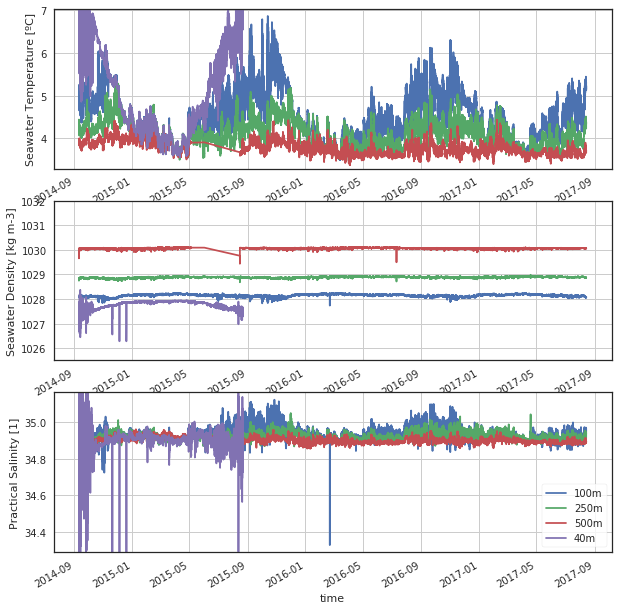

In [0]:
# - make plots for Temperature, Density and Salinity
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs = axs.ravel()

ctd_100m_temp.plot(ax=axs[0],label='100m')
ctd_250m_temp.plot(ax=axs[0],label='250m')
ctd_500m_temp.plot(ax=axs[0],label='500m')
ctd_40m_temp.plot(ax=axs[0],label='40m')
axs[0].grid(True)

ctd_100m_dens.plot(ax=axs[1],label='100m')
ctd_250m_dens.plot(ax=axs[1],label='250m')
ctd_500m_dens.plot(ax=axs[1],label='500m')
ctd_40m_dens.plot(ax=axs[1],label='40m')
axs[1].set_ylim(1025.5,1032.0)
axs[1].grid(True)

ctd_100m_sal.plot(ax=axs[2],label='100m')
ctd_250m_sal.plot(ax=axs[2],label='250m')
ctd_500m_sal.plot(ax=axs[2],label='500m')
ctd_40m_sal.plot(ax=axs[2],label='40m')
axs[2].grid(True)

plt.legend(frameon=True)

## 3.4 - CTD Annonation

In [0]:
ctd_40m_ref = 'GI01SUMO-RII11-02-CTDMOQ031'
ctd_40m_anno = get_ANNO_data(ctd_40m_ref); ctd_40m_df = print_ANNO(ctd_40m_anno);ctd_40m_df

,annotation,id,node,sensor,site,start,stop
0,"Deployment 1: Status data sent from the buoy included leak detects in the buoy well, drop in battery voltage, and loss of wind turbine input. Upon recovery, the buoy was primarily intact but several instruments were damaged and/or missing. Ice build-up on the tower is speculated to be the cause for much of the damage. No telemetered or recovered_host data expected. Functional instruments could continue to collect data using internal battery power and storage cards.",46.0,None,None,GI01SUMO,2015-02-15,2015-08-22 00:00:00
1,"Deployment 2: A period of violent weather caused power outages on multiple instruments. No telemetered or recovered_host data expected. Functional instruments could continue to collect data using internal battery power and storage cards. Upon recovery, the buoy well was flooded.",47.0,None,None,GI01SUMO,2016-01-27,2016-07-19 00:00:00
2,"Deployment 3: Wind turbines were disabled due to evidence of ice build-up on the surface buoy tower. The platform's battery charge state declined steadily. As of 2017-01-15, all DCLs were shut down and the telemetry schedule was reduced to conserve power. Battery-powered instruments should continue to collect data. UPDATE 2017-04-07: With increasing daylight at this location, sufficient power was generated by solar panels to re-establish limited high-bandwidth telemetry and data transmission. UPDATE: at recovery, wind turbines were missing their hubs and blades, and one solar panel was missing.",121.0,None,None,GI01SUMO,2016-12-27,2017-04-07 00:00:00
3,"Deployment 4: at 10:03 UTC on 12 October 2017 the Irminger Sea Surface Mooring stopped all communications. At recovery, the surface buoy was missing but the subsurface portion of the mooring was recovered. The cause of the damage is unknown.",102.0,None,None,GI01SUMO,2017-10-12,2018-06-14 08:02:00


# 4 - Flanking Subsurface Mooring : A (GI03FLMA - RIM01)

|S/N| Depth | Reference | Method | Stream |
|---|---|---|---|---|
|1|40m|02-CTDMOG041|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|2|60m|02-CTDMOG042|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|3|90m|02-CTDMOG043|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|4|250m|02-CTDMOG046|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|5|350m|02-CTDMOG047|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|6|500m|02-CTDMOG048|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|

In [0]:
# Define Instrument Information for the CTD
site = 'GI03FLMA'
node = 'RIM01'
method = 'recovered_inst'
stream = 'ctdmo_ghqr_instrument_recovered'

In [0]:
# - define the CTD o work with
# 40m, 60m, 90m, 250m, 350m,500m
FL_ctd_ids = ['02-CTDMOG041','02-CTDMOG042','02-CTDMOG043','02-CTDMOG046','02-CTDMOG047','02-CTDMOG048']

In [0]:
# generate the datasets urls
FL_html_urls_arr = []
for j in range(len(FL_ctd_ids)):
    data_path =  get_data_path2(SENSOR_BASE_URL,site,node,stream,FL_ctd_ids[j])
    r = requests.get(data_path, params=params, auth=(USERNAME, TOKEN))
    rjson = r.json(); url = rjson['allURLs'][0];
    print(url)
    FL_html_urls_arr.append(url)
np.savez('FL_html_urls_arr',FL_html_urls_arr=FL_html_urls_arr)

https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120620-GI03FLMA-RIM01-02-CTDMOG041-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120626-GI03FLMA-RIM01-02-CTDMOG042-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120632-GI03FLMA-RIM01-02-CTDMOG043-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120639-GI03FLMA-RIM01-02-CTDMOG046-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120646-GI03FLMA-RIM01-02-CTDMOG047-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/a

## 4.2 - Call functions and generate needed variables

In [0]:
FL_html_urls_arr

['https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120620-GI03FLMA-RIM01-02-CTDMOG041-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html',
 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120626-GI03FLMA-RIM01-02-CTDMOG042-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html',
 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120632-GI03FLMA-RIM01-02-CTDMOG043-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html',
 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120639-GI03FLMA-RIM01-02-CTDMOG046-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html',
 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T120646-GI03FLMA-RIM01-02-CTDMOG047-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html',
 'https://opendap.oceanobservatories.org

In [0]:
ctdmo_ghqr_instrument_recovered

In [0]:
# Generate the variable for all the chosen CTDs
FL_ctd_40m_temp,FL_ctd_40m_pres,FL_ctd_40m_cond,FL_ctd_40m_sal,FL_ctd_40m_dens = get_CTD_var(FL_html_urls_arr[0])
FL_ctd_60m_temp,FL_ctd_60m_pres,FL_ctd_60m_cond,FL_ctd_60m_sal,FL_ctd_60m_dens = get_CTD_var(FL_html_urls_arr[1])
#FL_ctd_90m_temp,FL_ctd_90m_pres,FL_ctd_90m_cond,FL_ctd_90m_sal,FL_ctd_90m_dens = get_CTD_var(FL_html_urls_arr[2])
FL_ctd_250m_temp,FL_ctd_250m_pres,FL_ctd_250m_cond,FL_ctd_250m_sal,FL_ctd_250m_dens = get_CTD_var(FL_html_urls_arr[3])
FL_ctd_350m_temp,FL_ctd_350m_pres,FL_ctd_350m_cond,FL_ctd_350m_sal,FL_ctd_350m_dens = get_CTD_var(FL_html_urls_arr[4])
FL_ctd_500m_temp,FL_ctd_500m_pres,FL_ctd_500m_cond,FL_ctd_500m_sal,FL_ctd_500m_dens = get_CTD_var(FL_html_urls_arr[5])

## 4.3 - Make Time serie plot

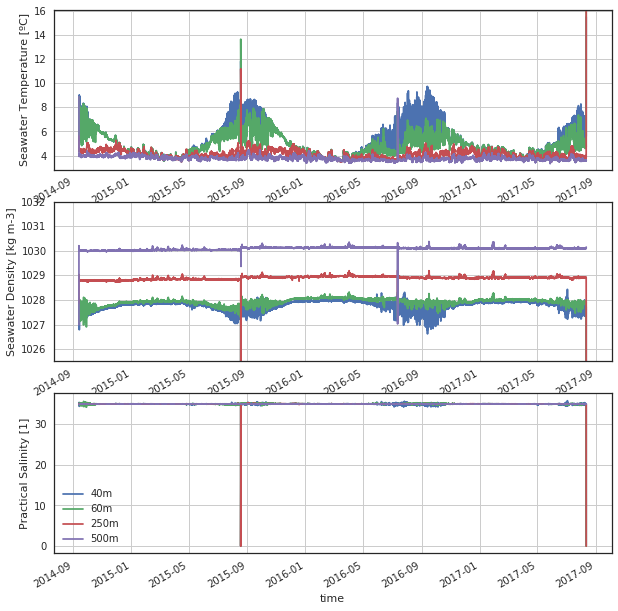

In [0]:
# - make plots for Temperature, Density and Salinity
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs = axs.ravel()

FL_ctd_40m_temp.plot(ax=axs[0],label='40m')
FL_ctd_60m_temp.plot(ax=axs[0],label='60m')
FL_ctd_250m_temp.plot(ax=axs[0],label='250m')
FL_ctd_500m_temp.plot(ax=axs[0],label='500m')
axs[0].grid(True)

FL_ctd_40m_dens.plot(ax=axs[1],label='40m')
FL_ctd_60m_dens.plot(ax=axs[1],label='60m')
FL_ctd_250m_dens.plot(ax=axs[1],label='250m')
FL_ctd_500m_dens.plot(ax=axs[1],label='500m')
axs[1].set_ylim(1025.5,1032.0)
axs[1].grid(True)

FL_ctd_40m_sal.plot(ax=axs[2],label='40m')
FL_ctd_60m_sal.plot(ax=axs[2],label='60m')
FL_ctd_250m_sal.plot(ax=axs[2],label='250m')
FL_ctd_500m_sal.plot(ax=axs[2],label='500m')
axs[2].grid(True)

plt.legend()

## 4.4 - CTD Annonation

In [0]:
Fl_ctd_500 = 'GI03FLMA-RIM01-02-CTDMOG048'
Fl_ctd_500m_anno = get_ANNO_data(Fl_ctd_500); Fl_ctd_500_df = print_ANNO(dd_20m_anno);Fl_ctd_500_df

,annotation,id,node,sensor,site,start,stop
0,Deployment 4: No data will be available via satellite telemetry for the remainder of the deployment. Data will be available when the mooring is recovered.,138.0,None,None,GI03FLMA,2017-09-27 00:00:00,None
1,Deployment 1: Mooring was deployed 10-15m shallower than planned.,683.0,None,None,GI03FLMA,2014-09-12 20:11:00,2015-08-18 10:41:00
2,Deployment 2: Mooring was deployed 5-10m deeper than planned.,684.0,None,None,GI03FLMA,2015-08-18 23:48:00,2016-07-17 00:00:00


# 5 - Flanking Subsurface Mooring B (GI03FLMB - RIM01)

|S/N| Depth | Reference | Method | Stream |
|---|---|---|---|---|
|1|40m|02-CTDMOG061|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|2|60m|02-CTDMOG062|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|3|90m|02-CTDMOG063|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|4|250m|02-CTDMOG066|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|5|350m|02-CTDMOG067|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|
|6|500m|02-CTDMOG068|recovered_host|ctdmo_ghqr_imodem_instrument_recovered|

In [0]:
# Define Instrument Information for the CTD
site = 'GI03FLMB'
node = 'RIM01'
method = 'recovered_inst'
stream = 'ctdmo_ghqr_instrument_recovered'

In [0]:
# - define the CTD o work with
# 40m, 60m, 90m, 250m, 350m,500m
FB_ctd_ids = ['02-CTDMOG061','02-CTDMOG062','02-CTDMOG063','02-CTDMOG066','02-CTDMOG067','02-CTDMOG068']

In [0]:
# generate the datasets urls
FB_html_urls_arr = []
for j in range(len(FB_ctd_ids)):
    data_path =  get_data_path2(SENSOR_BASE_URL,site,node,stream,FB_ctd_ids[j])
    r = requests.get(data_path, params=params, auth=(USERNAME, TOKEN))
    rjson = r.json(); url = rjson['allURLs'][0];
    print(url)
    FB_html_urls_arr.append(url)
np.savez('FB_html_urls_arr',FB_html_urls_arr=FB_html_urls_arr)

https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T131050-GI03FLMB-RIM01-02-CTDMOG061-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T131057-GI03FLMB-RIM01-02-CTDMOG062-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T131106-GI03FLMB-RIM01-02-CTDMOG063-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T131112-GI03FLMB-RIM01-02-CTDMOG066-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180723T131120-GI03FLMB-RIM01-02-CTDMOG067-recovered_inst-ctdmo_ghqr_instrument_recovered/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/a

## 5.2 - Call functions and generate needed variables

In [0]:
# Generate the variable for all the chosen CTDs
FB_ctd_40m_temp,FB_ctd_40m_pres,FB_ctd_40m_cond,FB_ctd_40m_sal,FB_ctd_40m_dens = get_CTD_var(FB_html_urls_arr[0])
FB_ctd_60m_temp,FB_ctd_60m_pres,FB_ctd_60m_cond,FB_ctd_60m_sal,FB_ctd_60m_dens = get_CTD_var(FB_html_urls_arr[1])
FB_ctd_90m_temp,FB_ctd_90m_pres,FB_ctd_90m_cond,FB_ctd_90m_sal,FB_ctd_90m_dens = get_CTD_var(FB_html_urls_arr[2])
FB_ctd_250m_temp,FB_ctd_250m_pres,FB_ctd_250m_cond,FB_ctd_250m_sal,FB_ctd_250m_dens = get_CTD_var(FB_html_urls_arr[3])
FB_ctd_350m_temp,FB_ctd_350m_pres,FB_ctd_350m_cond,FB_ctd_350m_sal,FB_ctd_350m_dens = get_CTD_var(FB_html_urls_arr[4])
FB_ctd_500m_temp,FB_ctd_500m_pres,FB_ctd_500m_cond,FB_ctd_500m_sal,FB_ctd_500m_dens = get_CTD_var(FB_html_urls_arr[5])

## 5.3 - Make Time serie plot

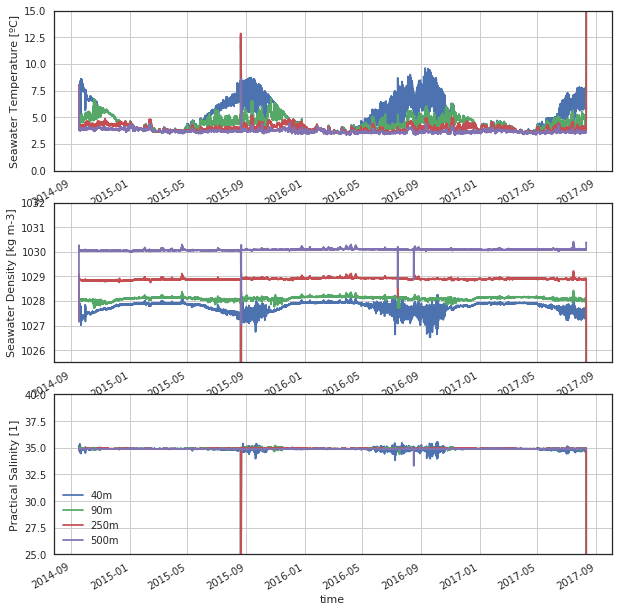

In [0]:
# - make plots for Temperature, Density and Salinity
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs = axs.ravel()

FB_ctd_40m_temp.plot(ax=axs[0],label='40m')
FB_ctd_90m_temp.plot(ax=axs[0],label='90m')
FB_ctd_250m_temp.plot(ax=axs[0],label='250m')
FB_ctd_500m_temp.plot(ax=axs[0],label='500m')
axs[0].grid(True)
axs[0].set_ylim(0,15)

FB_ctd_40m_dens.plot(ax=axs[1],label='40m')
FB_ctd_90m_dens.plot(ax=axs[1],label='90m')
FB_ctd_250m_dens.plot(ax=axs[1],label='250m')
FB_ctd_500m_dens.plot(ax=axs[1],label='500m')
axs[1].set_ylim(1025.5,1032.0)
axs[1].grid(True)

FB_ctd_40m_sal.plot(ax=axs[2],label='40m')
FB_ctd_90m_sal.plot(ax=axs[2],label='90m')
FB_ctd_250m_sal.plot(ax=axs[2],label='250m')
FB_ctd_500m_sal.plot(ax=axs[2],label='500m')
axs[2].grid(True)
axs[2].set_ylim(25,40)

plt.legend()

## 5.4 - Annonation

In [0]:
FB_ctd_500 = 'GI03FLMB-RIM01-02-02-CTDMOG068'
FB_ctd_500m_anno = get_ANNO_data(FB_ctd_500); FB_ctd_500_df = print_ANNO(FB_ctd_500m_anno);FB_ctd_500_df

,annotation,id,node,sensor,site,start,stop
0,Deployment 4: No data will be available via satellite telemetry for the remainder of the deployment. Data will be available when the mooring is recovered.,139.0,None,None,GI03FLMB,2017-10-11,None


# 6 - Comparison of CTD datasets

## 6.1 - Compare CTD @ 250m for all the mooring.

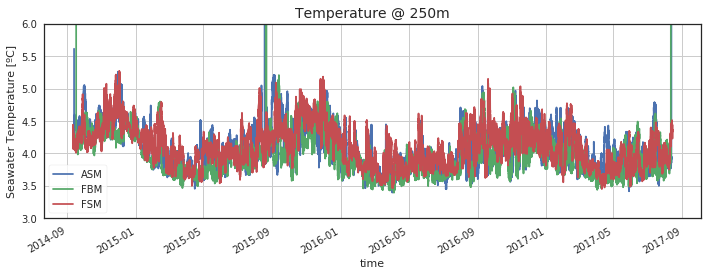

In [0]:
plt.figure(figsize=(10, 4))
FL_ctd_250m_temp.plot(label='ASM')
FB_ctd_250m_temp.plot(label='FBM')
ctd_250m_temp.plot(label='FSM')
plt.legend(frameon=True)
plt.grid(True)
plt.title('Temperature @ 250m',fontsize=14)
plt.ylim(3,6)
plt.tight_layout()

# B - ANALYSIS OF ADCP (75Hz) : Lets do some science 

## 7 - ADCP dataset reference id

|S/N|Mooring| Ref. Depth | Reference | Method | Stream |
|---|---|---|---|---|---|
|1|Flanking Subsurface A|500m|GI03FLMA-RIM01-02-ADCPSL003|recovered_inst|adcp_velocity_earth|
|2|Flanking Subsurface B|500m|GI03FLMB-RIM01-02-ADCPSL007|recovered_inst|adcp_velocity_earth|
|3|Apex Surface Mooring|500m|GI01SUMO-RII11-02-ADCPSN010|recovered_inst|adcp_velocity_earth|

In [0]:
params = {
  'format':'application/netcdf',
  'include_provenance':'true',
  'include_annotations':'true'
}

In [0]:
Adcp_A = ['GI03FLMA','RIM01','02-ADCPSL003','recovered_inst','adcp_velocity_earth']
Adcp_B = ['GI03FLMB','RIM01','02-ADCPSL007','recovered_inst','adcp_velocity_earth']
Adcp_S = ['GI01SUMO','RII11','02-ADCPSN010','recovered_inst','adcp_velocity_earth']

In [0]:
def get_adcp_url(params,inst): 
    '''make request for the dataset url'''
    global USERNAME, TOKEN
    subsite = inst[0]
    node = inst[1]
    sensor = inst[2]
    method = inst[3]
    stream = inst[4]
    data_request_url ='/'.join((SENSOR_BASE_URL,subsite,node,sensor,method,stream))
    r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
    rjson = r.json(); url = rjson['allURLs'][0];
    print(url)
    return url

In [0]:
def get_t_u_v_w(ds):
    '''get the variables in the Netcdf dataset'''
    ds = ds.sel(time=slice('2015-01-01','2015-03-31'))
    t = ds['time'].data
    d = ds['bin_depths'].data.T
    u = ds['eastward_seawater_velocity'].data.T
    v = ds['northward_seawater_velocity'].data.T
    w = ds['upward_seawater_velocity'].data.T
    lat = ds.lat.values[0]
    lon = ds.lon.values[0]
    return t,u,v,w,d,lat,lon

In [0]:
def get_adcp_ds(url):
    '''get the xarray dataset'''
    ds = xr.open_mfdataset(get_data_nc_from_url(url))
    ds = ds.swap_dims({'obs': 'time'})#
    return ds

In [0]:
#Adcp_A_url = get_adcp_url(params,Adcp_A)
Adcp_A_url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180719T195716-GI03FLMA-RIM01-02-ADCPSL003-recovered_inst-adcp_velocity_earth/catalog.html'

In [0]:
#Adcp_B_url = get_adcp_url(params,Adcp_B)
Adcp_B_url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180719T195828-GI03FLMB-RIM01-02-ADCPSL007-recovered_inst-adcp_velocity_earth/catalog.html'

In [0]:
#Adcp_S_url = get_adcp_url(params,Adcp_S)
Adcp_S_url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/adeajayi.kunle@gmail.com/20180719T201019-GI01SUMO-RII11-02-ADCPSN010-recovered_inst-adcp_velocity_earth/catalog.html'

**Note:** The 2015 winter dataset is considered for further analysis. 01/10/15 -- 31/03/15

In [0]:
t_A,u_A,v_A,w_A,d_A,lat_A,lon_A = get_t_u_v_w(get_ds(Adcp_A_url))
t_B,u_B,v_B,w_B,d_B,lat_B,lon_B = get_t_u_v_w(get_ds(Adcp_B_url))

In [0]:
# : the apex mooring dataset could noot be combined together for reaseons not clear at the moment, so the dataset was extracted without using the function above.
url3 = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/adeajayi.kunle@gmail.com/20180719T201019-GI01SUMO-RII11-02-ADCPSN010-recovered_inst-adcp_velocity_earth/deployment0001_GI01SUMO-RII11-02-ADCPSN010-recovered_inst-adcp_velocity_earth_20140910T190000-20150822T100000.nc'
adcp_ds = xr.open_dataset(url3)
adcp_ds = adcp_ds.swap_dims({'obs': 'time'})#
t_S,u_S,v_S,w_S,d_S,lat_S,lon_S = get_t_u_v_w(adcp_ds)

## 7.2 - Compare velocity for the tree ADCP
### Period, Winter: 2015-01-01 :2015-03-31

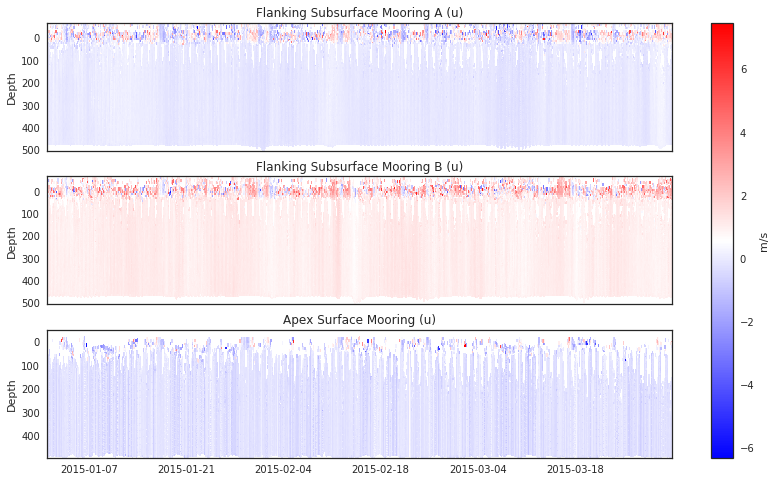

In [0]:
fig,axs = plt.subplots(3,1,figsize=(14,8))
axs = axs.ravel()
a0 = axs[0].pcolormesh(t_A,d_A,u_A,cmap='bwr');axs[0].invert_yaxis();
axs[0].set_title('Flanking Subsurface Mooring A (u)')
axs[0].set_xticks([]);axs[0].set_ylabel('Depth')
axs[1].pcolormesh(t_B,d_B,u_B,cmap='bwr'); axs[1].invert_yaxis();
axs[1].set_title('Flanking Subsurface Mooring B (u)')
axs[1].set_xticks([]);axs[1].set_ylabel('Depth')
axs[2].pcolormesh(t_S,d_S,u_S,cmap='bwr'); axs[2].invert_yaxis();
axs[2].set_title('Apex Surface Mooring (u)');axs[2].set_ylabel('Depth')
fig.colorbar(a0,ax=axs.ravel().tolist(), label='m/s')

## 7.3 - Compute the velocity gradients

In [0]:
import math as m
#-Degree to distance
degree_to_m = 111000.0 #units metre
#-Coriolis parameter
f = 1.094*(10**(-4)) #units per second

In [0]:
#-Function to convert degree to metres
def compute_dx(lon_2,lon_1,lat_2,lat_1):
    dx = (lon_2 - lon_1)*(m.cos(np.mean([lat_1,lat_2])*(m.pi/180.0)))*degree_to_m
    return dx
     
def compute_dy(lat_2,lat_1):
    dy = (lat_2 - lat_1)*degree_to_m
    return dy

In [0]:
#Compute dx
dx_A_B = compute_dx(lon_A,lon_B,lat_A,lat_B)
dx_S_A = compute_dx(lon_S,lon_A,lat_S,lat_A)
dx_B_S = compute_dx(lon_B,lon_S,lat_B,lat_S)

In [0]:
#Compute dy
dy_A_B = compute_dy(lat_A,lat_B)
dy_S_A = compute_dy(lat_S,lat_A)
dy_B_S = compute_dy(lat_B,lat_S)

**Note :** The number of vertical layers in Apex surface mooring for the ADCP is different compare to the flanking moorings A and B. In order to ensure accurate computation of the velocity gradients, the velocity time series between 100 and 400 meters was then considered, which conrespond to 5 : 45 layes in the array.

In [0]:
# - compute du/dx for each mooring pair
du_dx_A_B = (u_A[5:45,:] - u_B[5:45,:])/dx_A_B
du_dy_A_B = (u_A[5:45,:] - u_B[5:45,:])/dy_A_B

du_dx_S_A = (u_S[5:45,:] - u_A[5:45,:])/dx_S_A
du_dy_S_A = (u_S[5:45,:] - u_A[5:45,:])/dy_S_A

du_dx_B_S = (u_B[5:45,:] - u_S[5:45,:])/dx_B_S
du_dy_B_S = (u_B[5:45,:] - u_S[5:45,:])/dy_B_S

In [0]:
# - compute dv/dx for each mooring pair
dv_dx_A_B = (v_A[5:45,:] - v_B[5:45,:])/dx_A_B
dv_dy_A_B = (v_A[5:45,:] - v_B[5:45,:])/dy_A_B

dv_dx_S_A = (v_S[5:45,:] - v_A[5:45,:])/dx_S_A
dv_dy_S_A = (v_S[5:45,:] - v_A[5:45,:])/dy_S_A

dv_dx_B_S = (v_B[5:45,:] - v_S[5:45,:])/dx_B_S
dv_dy_B_S = (v_B[5:45,:] - v_S[5:45,:])/dy_B_S

In [0]:
# compute the avearage velocity gradient
du_dx = (1.0/3)*(du_dx_A_B + du_dx_S_A + du_dx_B_S)
du_dy = (1.0/3)*(du_dy_A_B + du_dy_S_A + du_dy_B_S)

dv_dx = (1.0/3)*(dv_dx_A_B + dv_dx_S_A + dv_dx_B_S)
dv_dy = (1.0/3)*(dv_dy_A_B + dv_dy_S_A + dv_dy_B_S)

In [0]:
#-Relative velocity
RV = (dv_dx - du_dy)/f
#-Divergence
DV = (du_dx + dv_dy)/f
# - Strain rate
SR = (np.sqrt(np.square(du_dx - dv_dy) + np.square(dv_dx + du_dy)))/f

## 7.4 - Plots Velocity gradients time series

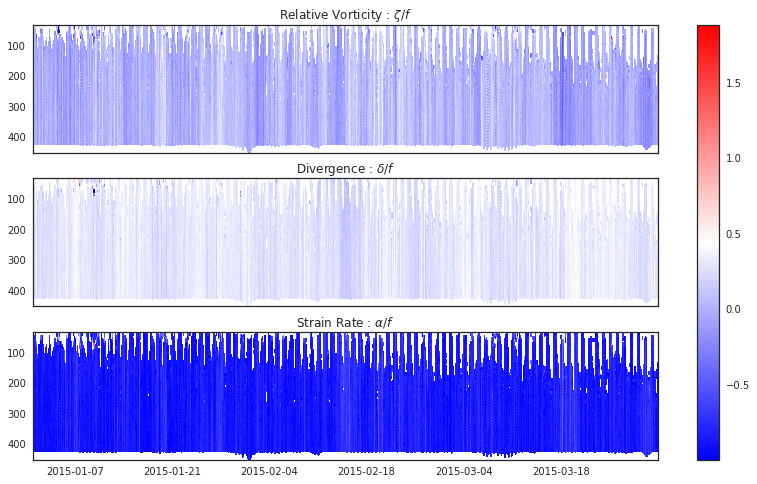

In [0]:
fig,axs = plt.subplots(3,1,figsize=(14,8))
axs = axs.ravel()
a0 = axs[0].pcolormesh(t_A,d_A[5:45,:],RV,cmap='bwr');axs[0].invert_yaxis();
axs[0].set_title('Relative Vorticity : $\zeta/f$')
axs[0].set_xticks([])
a1 = axs[1].pcolormesh(t_A,d_A[5:45,:],DV,cmap='bwr'); axs[1].invert_yaxis();
axs[1].set_title('Divergence : '+ '$\delta/f$')
axs[1].set_xticks([])
a2 = axs[2].pcolormesh(t_A,d_A[5:45,:],SR,cmap='bwr'); axs[2].invert_yaxis();
axs[2].set_title('Strain Rate : '+ r'$\alpha/f$')
fig.colorbar(a0,ax=axs.ravel().tolist())

## 7.5 - PDF of Velocity gradients

In [0]:
def get_NoNaN_ugrad(data):
    data = np.array(data)
    data_1d = data.reshape(1,40*2160)
    data_1d_NoNaN =data_1d[~np.isnan(data_1d)]
    return data_1d_NoNaN

In [0]:
# - Reshape and remove NaN
RV_NoNaN = get_NoNaN_ugrad(RV)
DV_NoNaN = get_NoNaN_ugrad(DV)
SR_NoNaN = get_NoNaN_ugrad(SR)

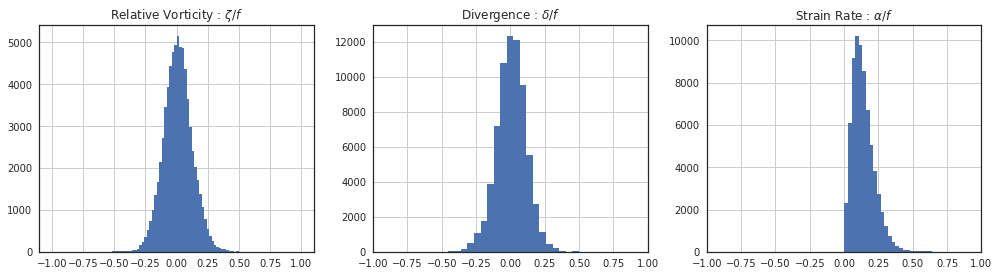

In [0]:
fig,axs = plt.subplots(1,3,figsize=(14,4))
axs = axs.ravel()
axs[0].hist(RV_1d_NoNaN,bins=100,range=(-1.0,1.0));
axs[0].set_title('Relative Vorticity : $\zeta/f$')
axs[0].grid(True)

axs[1].hist(DV_NoNaN,bins=100)
axs[1].set_title('Divergence : '+ '$\delta/f$')
axs[1].set_xlim(-1,1.0)
axs[1].grid(True)

axs[2].hist(SR_NoNaN,bins=100)
axs[2].set_xlim(-1.0,1.0)
axs[2].set_title('Strain Rate : '+ r'$\alpha/f$')
axs[2].grid(True)
fig.tight_layout()

# Notes and Conclusion

- The Apex mooring CTD -40m recovered data for 9/14 t0 9/15 only, but the rest of the CTD have complete dataset.
- The time serei of contains spike at irregular intervals.
- The time series of the temperature decreases with depth and also recorded higher values in summer time and lower values in winter.This is consistent with what is expected in the ocean watar column.
- Surface data of the ADCP is bad as can been seen in the time series plot.
- There is strong aggreement between the time series of the mooring array at all depths.
- In overall the mooring datasets at the Global Irminger Sea are in fair agreement and the CTD and ADCP dataset is good for scientifc study
- Follwing the analysis of the velocity gradients using velocity profiles from ADCP, it is shown that Global Irminger Sea station is govern by mesoscale dynamics in winter time (with low rossby number) and this confirm that the velocity profiles are within expected range.